# Load data

In [ ]:
#first predictive model just based on travel dates, using linear regression 
data_url = 'https://www.eia.gov/dnav/pet/xls/PET_PRI_GND_DCUS_NUS_W.xls'

In [ ]:
import pandas as pd
df = pd.read_excel(data_url, sheet_name=1, header=2)

# Describe data set

In [ ]:
df.shape

(1578, 16)

In [ ]:
df.isna().sum()

Date                                                                                          0
Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)        137
Weekly U.S. All Grades Conventional Retail Gasoline Prices  (Dollars per Gallon)            223
Weekly U.S. All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)            223
Weekly U.S. Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)             6
Weekly U.S. Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)                 6
Weekly U.S. Regular Reformulated Retail Gasoline Prices  (Dollars per Gallon)               223
Weekly U.S. Midgrade All Formulations Retail Gasoline Prices  (Dollars per Gallon)          223
Weekly U.S. Midgrade Conventional Retail Gasoline Prices  (Dollars per Gallon)              223
Weekly U.S. Midgrade Reformulated Retail Gasoline Prices  (Dollars per Gallon)              223
Weekly U.S. Premium All Formulations Ret

In [ ]:
col_name = 'Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)'

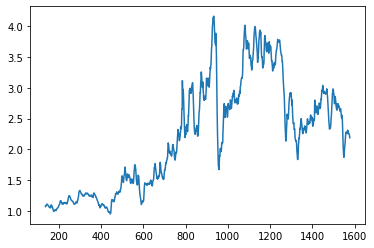

In [ ]:
df[col_name].plot()

# Data pre-processing

Drop NaNs

In [ ]:
small_df = df[['Date', col_name]]
small_df.isna().sum()

Date                                                                                      0
Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)    137
dtype: int64

In [ ]:
small_df = small_df.dropna()
small_df.isna().sum()

Date                                                                                    0
Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)    0
dtype: int64

Feature engineering

In [ ]:
small_df['year'] = small_df['Date'].dt.year
small_df['week'] = small_df['Date'].dt.isocalendar().week
small_df['prev_price'] = small_df[col_name].shift(periods=1)

Drop years before 1995

In [ ]:
small_df = small_df[small_df['year'] > 1995]

# First model: use dates to predict price

In [ ]:
X_train = small_df[small_df['year'] < 2020][['year', 'week', 'prev_price']]
y_train = small_df[small_df['year'] < 2020][col_name]
X_test = small_df[small_df['year'] >= 2020][['year', 'week', 'prev_price']]
y_test = small_df[small_df['year'] >= 2020][col_name]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.metrics import explained_variance_score

all_models = [
    LinearRegression(),
    svm.SVR(),
    KNeighborsRegressor(n_neighbors=10),
    MLPRegressor(max_iter=500),
    RandomForestRegressor(),
  ]

for md in all_models:
  cv_results = cross_validate(
      md, X_train, y_train, cv=4,
      scoring='explained_variance', return_estimator=True
    )
  print(cv_results['test_score'])

  best_index = cv_results['test_score'].argmax()
  best = cv_results['estimator'][best_index]
  print(explained_variance_score(y_test, best.predict(X_test)))
  print()

[0.98395322 0.99139447 0.9882618  0.98957865]
0.9418982086494484

[ 0.01164001  0.02196836  0.0135039  -0.00568383]
-0.019439242929050415

[0.09310307 0.65260942 0.33449026 0.05426247]
-1.6457382849113076

[0.98207668 0.99092233 0.98764077 0.98799143]
0.9432161029247874

[0.882849   0.98434502 0.97128365 0.98242933]
0.9494663686659384



1. added last week's price as new column
2. compared between many different model
3. used CV to get many versions of the same model - why is 4 folds much better than 5 folds (cv=4)

To Do: 
1. tweak parameters of linear regression, MLP, random forest (try to get better scores)
2. is explained variance the right metric to use? alternatives?
3. add a new column (price from two weeks ago)
4. try on east coast / west coast data